In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Import the citipy module
from citipy import citipy

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

628

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
    
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | ayr
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | solikamsk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | sinnamary
Processing Record 13 of Set 1 | roebourne
Processing Record 14 of Set 1 | shache
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | mezhdurechenskiy
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | mataura
Processing Recor

Processing Record 36 of Set 4 | vostok
Processing Record 37 of Set 4 | yulara
Processing Record 38 of Set 4 | baiyin
Processing Record 39 of Set 4 | dumas
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | corn island
Processing Record 42 of Set 4 | daugavpils
Processing Record 43 of Set 4 | mountrath
Processing Record 44 of Set 4 | aitape
Processing Record 45 of Set 4 | oussouye
Processing Record 46 of Set 4 | concordia
Processing Record 47 of Set 4 | kulhudhuffushi
Processing Record 48 of Set 4 | winnemucca
Processing Record 49 of Set 4 | ambunti
Processing Record 50 of Set 4 | moose jaw
Processing Record 1 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 2 of Set 5 | broome
Processing Record 3 of Set 5 | svetlyy
Processing Record 4 of Set 5 | sioux lookout
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | chanika
Processing Record 9 of Set 5 | meulaboh
Pr

Processing Record 25 of Set 8 | mokhsogollokh
Processing Record 26 of Set 8 | vanavara
Processing Record 27 of Set 8 | siverek
Processing Record 28 of Set 8 | freeport
Processing Record 29 of Set 8 | dubti
Processing Record 30 of Set 8 | hay river
Processing Record 31 of Set 8 | ruteng
Processing Record 32 of Set 8 | konosha
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | mergui
City not found. Skipping...
Processing Record 36 of Set 8 | visby
Processing Record 37 of Set 8 | cortez
Processing Record 38 of Set 8 | trelew
Processing Record 39 of Set 8 | naryan-mar
Processing Record 40 of Set 8 | edd
Processing Record 41 of Set 8 | ust-nera
City not found. Skipping...
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | bokoro
Processing Record 44 of Set 8 | arraial do cabo
Processing Record 45 of Set 8 | letka
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | mentok
City not found

Processing Record 15 of Set 12 | akhmeta
Processing Record 16 of Set 12 | lasa
Processing Record 17 of Set 12 | oni
Processing Record 18 of Set 12 | bitung
Processing Record 19 of Set 12 | la seyne-sur-mer
Processing Record 20 of Set 12 | leningradskiy
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | muroto
Processing Record 23 of Set 12 | brownsville
Processing Record 24 of Set 12 | olavarria
Processing Record 25 of Set 12 | san jeronimo
Processing Record 26 of Set 12 | husavik
Processing Record 27 of Set 12 | turbat
Processing Record 28 of Set 12 | san cristobal
Processing Record 29 of Set 12 | russell
Processing Record 30 of Set 12 | norilsk
Processing Record 31 of Set 12 | porto nacional
Processing Record 32 of Set 12 | oranjestad
Processing Record 33 of Set 12 | shawinigan
Processing Record 34 of Set 12 | luwuk
Processing Record 35 of Set 12 | bondo
Processing Record 36 of Set 12 | paris
Processing Record 37 of Set 12 | ichhawar
Processing Record 38 of Se

In [13]:
len(city_data)

575

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,82.56,42,75,10.36,CA,2022-07-19 23:26:48
1,Ushuaia,-54.8000,-68.3000,38.86,81,75,4.61,AR,2022-07-19 23:26:48
2,Ayr,55.4627,-4.6339,61.99,92,82,9.19,GB,2022-07-19 23:26:48
3,Kapaa,22.0752,-159.3190,85.98,73,100,16.11,US,2022-07-19 23:26:49
4,Yellowknife,62.4560,-114.3525,75.72,43,75,17.27,CA,2022-07-19 23:26:09
5,Solikamsk,59.6196,56.7729,57.04,98,22,6.38,RU,2022-07-19 23:26:50
6,Vaini,-21.2000,-175.2000,77.16,88,40,10.36,TO,2022-07-19 23:26:50
7,Airai,-8.9266,125.4092,56.28,65,49,2.48,TL,2022-07-19 23:26:50
8,Lavrentiya,65.5833,-171.0000,43.61,63,99,4.34,RU,2022-07-19 23:26:51
9,Pangnirtung,66.1451,-65.7125,47.66,80,100,2.01,CA,2022-07-19 23:26:51


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-19 23:26:48,55.7435,-97.8558,82.56,42,75,10.36
1,Ushuaia,AR,2022-07-19 23:26:48,-54.8000,-68.3000,38.86,81,75,4.61
2,Ayr,GB,2022-07-19 23:26:48,55.4627,-4.6339,61.99,92,82,9.19
3,Kapaa,US,2022-07-19 23:26:49,22.0752,-159.3190,85.98,73,100,16.11
4,Yellowknife,CA,2022-07-19 23:26:09,62.4560,-114.3525,75.72,43,75,17.27
5,Solikamsk,RU,2022-07-19 23:26:50,59.6196,56.7729,57.04,98,22,6.38
6,Vaini,TO,2022-07-19 23:26:50,-21.2000,-175.2000,77.16,88,40,10.36
7,Airai,TL,2022-07-19 23:26:50,-8.9266,125.4092,56.28,65,49,2.48
8,Lavrentiya,RU,2022-07-19 23:26:51,65.5833,-171.0000,43.61,63,99,4.34
9,Pangnirtung,CA,2022-07-19 23:26:51,66.1451,-65.7125,47.66,80,100,2.01


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

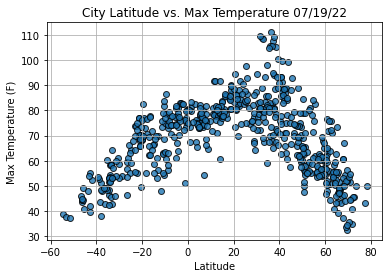

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

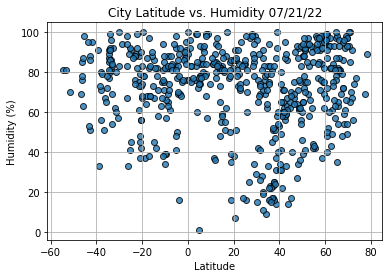

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

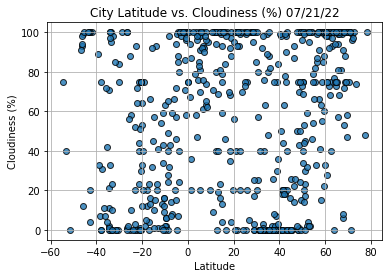

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

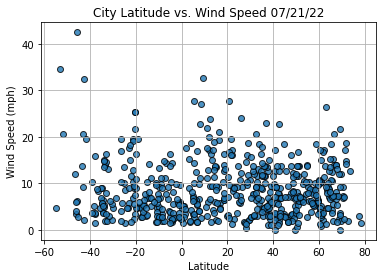

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-07-19 23:26:53
Lat                      -34.5322
Lng                       20.0403
Max Temp                    46.26
Humidity                       87
Cloudiness                     11
Wind Speed                   3.76
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
570     True
571     True
572    False
573    False
574     True
Name: Lat, Length: 575, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-07-19 23:26:48,55.7435,-97.8558,82.56,42,75,10.36
2,Ayr,GB,2022-07-19 23:26:48,55.4627,-4.6339,61.99,92,82,9.19
3,Kapaa,US,2022-07-19 23:26:49,22.0752,-159.3190,85.98,73,100,16.11
4,Yellowknife,CA,2022-07-19 23:26:09,62.4560,-114.3525,75.72,43,75,17.27
5,Solikamsk,RU,2022-07-19 23:26:50,59.6196,56.7729,57.04,98,22,6.38


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

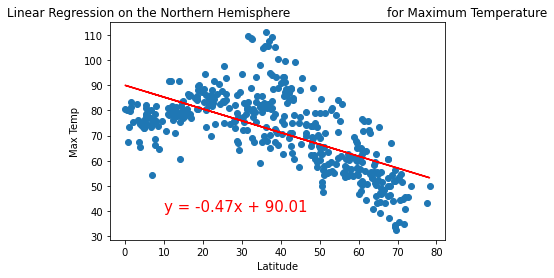

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

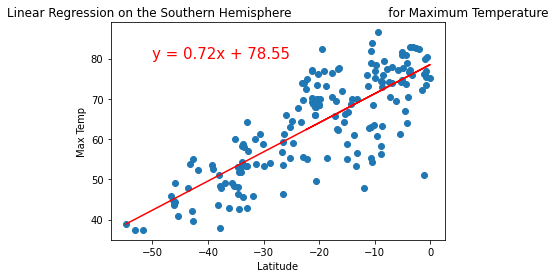

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

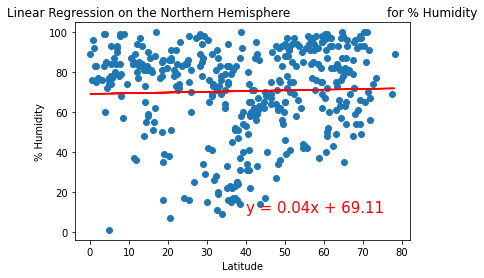

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

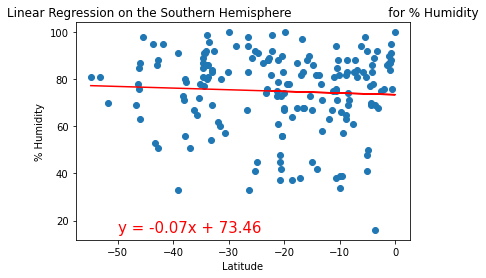

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

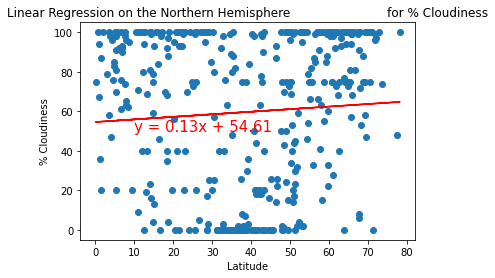

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

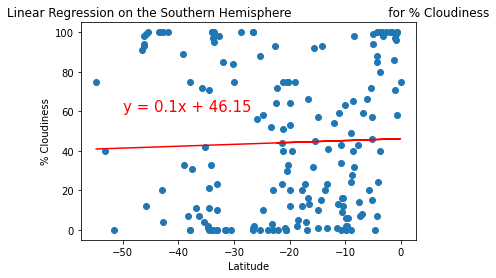

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

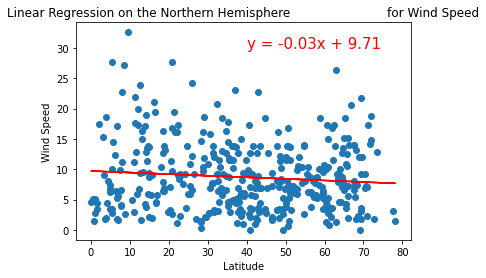

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

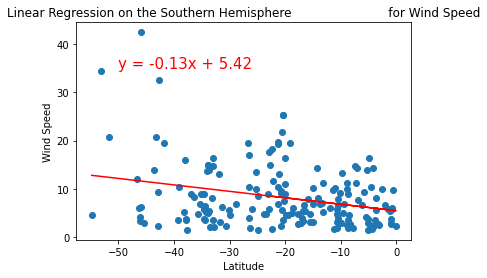

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))